In [1]:
from binance.client import Client
import pandas as pd
import time

# Initialisation du client Binance
client = Client()

# Paramètres de l'extraction
symbol = 'BTCUSDT'
interval = Client.KLINE_INTERVAL_1HOUR
start_date = '1 Jan, 2023'
end_date = '31 Dec, 2023'

# Fonction pour extraire des données historiques de Binance
def get_historical_data(symbol, interval, start_date, end_date):
    # Convertir les dates en timestamps
    start_ts = int(pd.Timestamp(start_date).timestamp() * 1000)
    end_ts = int(pd.Timestamp(end_date).timestamp() * 1000)
    klines = []

    # Télécharger les données par lots (max 1000 chandeliers par requête)
    while start_ts < end_ts:
        temp_klines = client.get_klines(
            symbol=symbol,
            interval=interval,
            limit=1000,
            startTime=start_ts
        )
        if not temp_klines:
            break
        klines.extend(temp_klines)
        start_ts = temp_klines[-1][0] + 1  # Passer au prochain lot
        time.sleep(0.1)  # Respecter les limites de l'API

    # Transformer les données en DataFrame
    df = pd.DataFrame(klines, columns=[
        'timestamp', 'open', 'high', 'low', 'close', 'volume',
        'close_time', 'quote_asset_volume', 'number_of_trades',
        'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume', 'ignore'
    ])
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')  # Convertir en format lisible
    df[['open', 'high', 'low', 'close', 'volume']] = df[['open', 'high', 'low', 'close', 'volume']].astype(float)
    return df

# Extraire les données
df = get_historical_data(symbol, interval, start_date, end_date)

# Sauvegarder les données dans un fichier CSV
output_file = "BTCUSDT_hourly_2023.csv"
df.to_csv(output_file, index=False)
print(f"Données sauvegardées dans {output_file}")




Données sauvegardées dans BTCUSDT_hourly_2023.csv


In [2]:
# Charger les données depuis le fichier CSV
data_file = "BTCUSDT_hourly_2023.csv"
df = pd.read_csv(data_file)

# Convertir la colonne 'timestamp' en format datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Vérifier les données
print(df.head())
print(df.info())


            timestamp      open      high       low     close      volume  \
0 2023-01-01 00:00:00  16541.77  16545.70  16508.39  16529.67  4364.83570   
1 2023-01-01 01:00:00  16529.59  16556.80  16525.78  16551.47  3590.06669   
2 2023-01-01 02:00:00  16551.47  16559.77  16538.14  16548.19  3318.84038   
3 2023-01-01 03:00:00  16548.19  16548.19  16518.21  16533.04  4242.08050   
4 2023-01-01 04:00:00  16533.04  16535.97  16511.92  16521.85  4285.00909   

      close_time  quote_asset_volume  number_of_trades  \
0  1672534799999        7.214629e+07            149854   
1  1672538399999        5.937676e+07            126556   
2  1672541999999        5.491945e+07            115398   
3  1672545599999        7.012254e+07            137724   
4  1672549199999        7.080264e+07            129535   

   taker_buy_base_asset_volume  taker_buy_quote_asset_volume  ignore  
0                   2179.94772                  3.603235e+07       0  
1                   1730.24901                

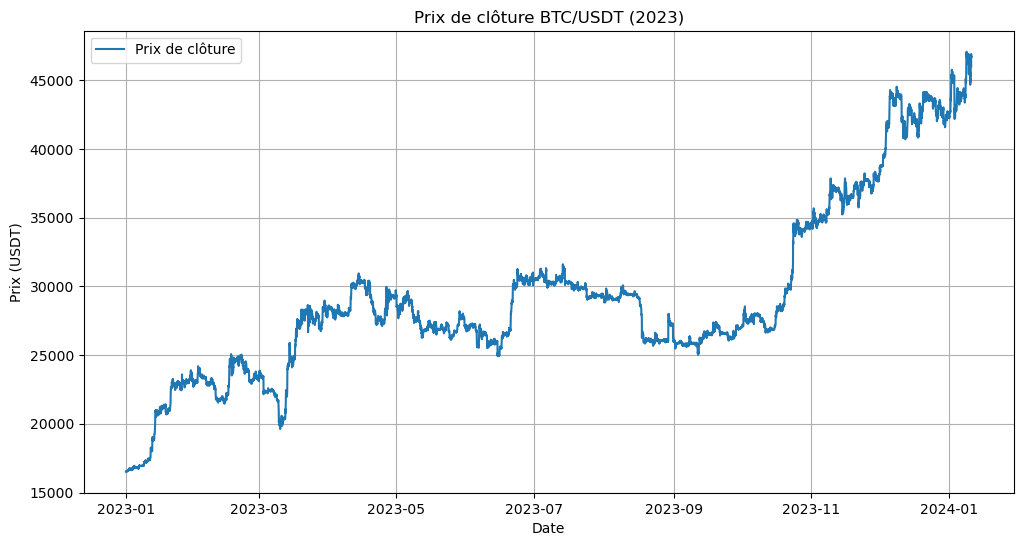

In [3]:
import matplotlib.pyplot as plt

# Graphique simple des prix de clôture
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['close'], label='Prix de clôture')
plt.title("Prix de clôture BTC/USDT (2023)")
plt.xlabel("Date")
plt.ylabel("Prix (USDT)")
plt.legend()
plt.grid()
plt.show()


In [4]:
# Afficher un aperçu des 10 premières et 10 dernières lignes
def display_head_tail(df, head=10, tail=10):
    return pd.concat([df.head(head), df.tail(tail)])

# Aperçu
reduced_df = display_head_tail(df)
print(reduced_df)


               timestamp      open      high       low     close       volume  \
0    2023-01-01 00:00:00  16541.77  16545.70  16508.39  16529.67   4364.83570   
1    2023-01-01 01:00:00  16529.59  16556.80  16525.78  16551.47   3590.06669   
2    2023-01-01 02:00:00  16551.47  16559.77  16538.14  16548.19   3318.84038   
3    2023-01-01 03:00:00  16548.19  16548.19  16518.21  16533.04   4242.08050   
4    2023-01-01 04:00:00  16533.04  16535.97  16511.92  16521.85   4285.00909   
5    2023-01-01 05:00:00  16522.22  16534.98  16512.30  16530.71   3717.37178   
6    2023-01-01 06:00:00  16530.71  16550.00  16528.81  16539.79   3344.90206   
7    2023-01-01 07:00:00  16539.79  16544.57  16499.01  16526.19   5184.95822   
8    2023-01-01 08:00:00  16525.70  16534.03  16508.45  16513.34   4271.92023   
9    2023-01-01 09:00:00  16513.33  16542.49  16505.20  16537.88   4100.75049   
8990 2024-01-10 15:00:00  44884.01  45630.70  44800.00  45546.40   4166.81930   
8991 2024-01-10 16:00:00  45

In [5]:
import pandas as pd

# Fonction pour styliser et afficher un tableau esthétique des 10 premières et 10 dernières lignes
def styled_head_tail(df, head=10, tail=10):
    # Combiner les 10 premières et 10 dernières lignes
    reduced_df = pd.concat([df.head(head), df.tail(tail)])
    
    # Appliquer un style
    styled_df = reduced_df.style.set_caption("Aperçu des 10 premières et 10 dernières lignes") \
        .background_gradient(subset=['close'], cmap='viridis') \
        .format({
            'open': '{:,.2f}',
            'high': '{:,.2f}',
            'low': '{:,.2f}',
            'close': '{:,.2f}',
            'volume': '{:,.0f}'
        }) \
        .highlight_max(subset=['high'], color='lightgreen') \
        .highlight_min(subset=['low'], color='lightcoral')
    
    return styled_df

styled_head_tail(df)


,timestamp,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
0,2023-01-01 00:00:00,"16,541.77","16,545.70","16,508.39","16,529.67","4,365",1672534799999,72146293.586723,149854,2179.947720,36032352.870357,0
1,2023-01-01 01:00:00,"16,529.59","16,556.80","16,525.78","16,551.47","3,590",1672538399999,59376757.344609,126556,1730.249010,28617416.004864,0
2,2023-01-01 02:00:00,"16,551.47","16,559.77","16,538.14","16,548.19","3,319",1672541999999,54919453.375621,115398,1611.123020,26660867.867736,0
3,2023-01-01 03:00:00,"16,548.19","16,548.19","16,518.21","16,533.04","4,242",1672545599999,70122541.937454,137724,2096.092870,34649044.485130,0
4,2023-01-01 04:00:00,"16,533.04","16,535.97","16,511.92","16,521.85","4,285",1672549199999,70802644.478145,129535,2188.401750,36159818.024071,0
5,2023-01-01 05:00:00,"16,522.22","16,534.98","16,512.30","16,530.71","3,717",1672552799999,61412217.127378,118541,1925.655830,31812891.585456,0
6,2023-01-01 06:00:00,"16,530.71","16,550.00","16,528.81","16,539.79","3,345",1672556399999,55329560.653451,106074,1625.161790,26882457.057641,0
7,2023-01-01 07:00:00,"16,539.79","16,544.57","16,499.01","16,526.19","5,185",1672559999999,85663591.929699,148545,2476.590150,40917573.365295,0
8,2023-01-01 08:00:00,"16,525.70","16,534.03","16,508.45","16,513.34","4,272",1672563599999,70568383.457783,135605,2092.402700,34565020.094014,0
9,2023-01-01 09:00:00,"16,513.33","16,542.49","16,505.20","16,537.88","4,101",1672567199999,67754195.982209,134070,2103.341390,34752675.689757,0


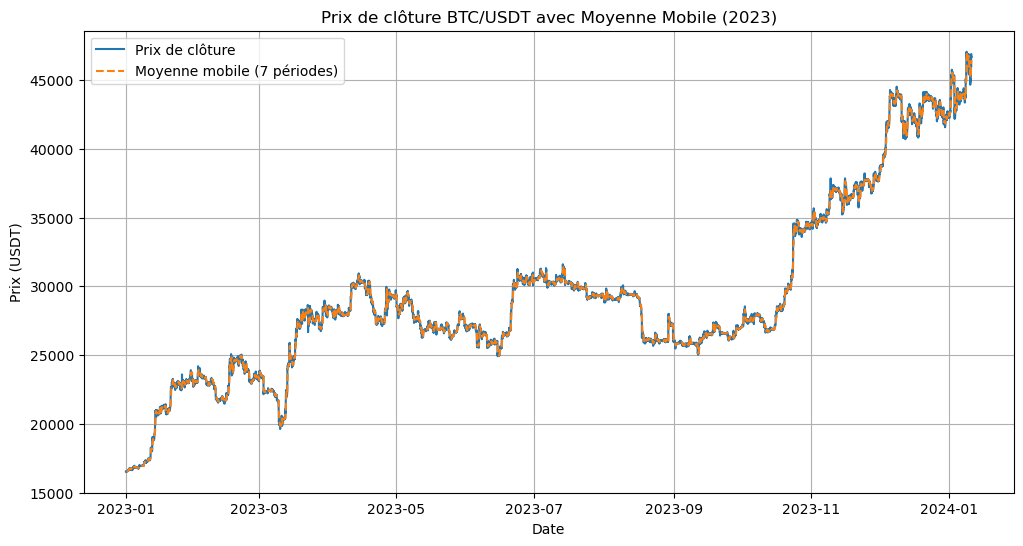

In [6]:
# Ajouter une moyenne mobile sur 7 jours
df['SMA_7'] = df['close'].rolling(window=7).mean()

# Graphique avec SMA
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['close'], label='Prix de clôture')
plt.plot(df['timestamp'], df['SMA_7'], label='Moyenne mobile (7 périodes)', linestyle='--')
plt.title("Prix de clôture BTC/USDT avec Moyenne Mobile (2023)")
plt.xlabel("Date")
plt.ylabel("Prix (USDT)")
plt.legend()
plt.grid()
plt.show()



In [7]:
pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=cf9fef9fd3f0a8dda470493f957dcc282c3033d65af04190847770fd636cbf69
  Stored in directory: /home/onyxia/.cache/pip/wheels/5c/a1/5f/c6b85a7d9452057be4ce68a8e45d77ba34234a6d46581777c6
Successfully built ta
Note: you may need to restart the kernel to use updated packages.


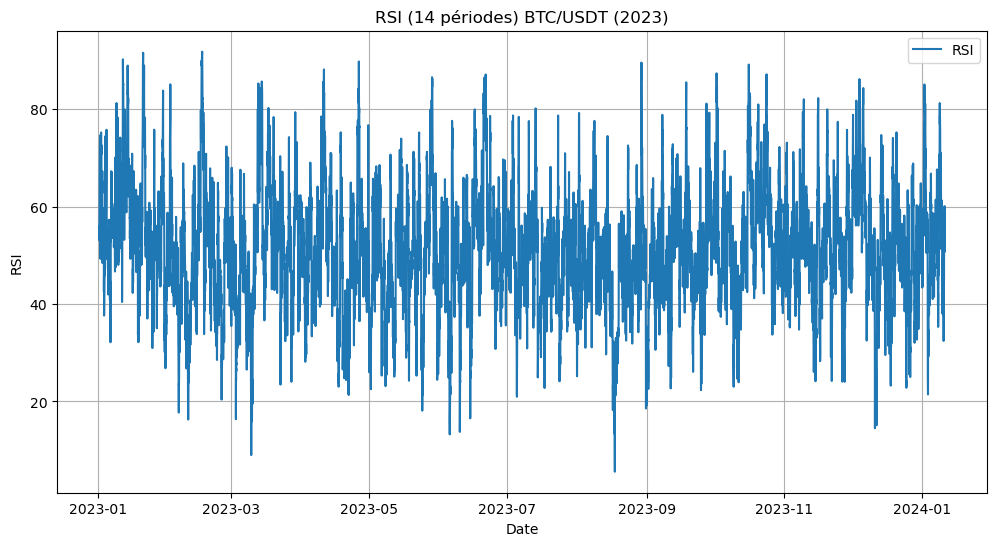

In [8]:
from ta.momentum import RSIIndicator

# Calculer le RSI
rsi = RSIIndicator(close=df['close'], window=14)
df['RSI'] = rsi.rsi()

# Visualisation RSI
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['RSI'], label='RSI')
plt.title("RSI (14 périodes) BTC/USDT (2023)")
plt.xlabel("Date")
plt.ylabel("RSI")
plt.legend()
plt.grid()
plt.show()


In [9]:
import pandas as pd
from ta.momentum import RSIIndicator
from ta.volatility import AverageTrueRange
from ta.trend import MACD, EMAIndicator


df.set_index('timestamp', inplace=True)

# Ajouter EMA (Exponential Moving Average)
ema = EMAIndicator(close=df['close'], window=14)
df['EMA_14'] = ema.ema_indicator()

# Ajouter RSI (Relative Strength Index)
rsi = RSIIndicator(close=df['close'], window=14)
df['RSI_14'] = rsi.rsi()

# Ajouter ATR (Average True Range)
atr = AverageTrueRange(high=df['high'], low=df['low'], close=df['close'], window=14)
df['ATR_14'] = atr.average_true_range()

# Ajouter MACD (Moving Average Convergence Divergence)
macd = MACD(close=df['close'], window_slow=26, window_fast=12, window_sign=9)
df['MACD'] = macd.macd()
df['Signal_Line'] = macd.macd_signal()

# Fonction pour styliser et afficher les 10 premières et 10 dernières lignes
def styled_head_tail_with_indicators(df, head=10, tail=10):
    # Combiner les 10 premières et 10 dernières lignes
    reduced_df = pd.concat([df.head(head), df.tail(tail)])
    
    # Styliser le tableau
    styled_df = reduced_df.style.set_caption("Aperçu des 10 Premières et 10 Dernières Lignes avec Indicateurs") \
        .background_gradient(subset=['close', 'EMA_14', 'RSI_14', 'ATR_14', 'MACD'], cmap='viridis') \
        .format({
            'open': '{:,.2f}',
            'high': '{:,.2f}',
            'low': '{:,.2f}',
            'close': '{:,.2f}',
            'volume': '{:,.0f}',
            'EMA_14': '{:,.2f}',
            'RSI_14': '{:,.2f}',
            'ATR_14': '{:,.2f}',
            'MACD': '{:,.2f}',
            'Signal_Line': '{:,.2f}'
        }) \
        .highlight_max(subset=['high'], color='lightgreen') \
        .highlight_min(subset=['low'], color='lightcoral')
    
    return styled_df

# Appliquer la fonction au DataFrame
styled_table_with_indicators = styled_head_tail_with_indicators(df)

# Afficher le tableau stylisé
styled_table_with_indicators


,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore,SMA_7,RSI,EMA_14,RSI_14,ATR_14,MACD,Signal_Line
timestamp,,,,,,,,,,,,,,,,,,
2023-01-01 00:00:00,"16,541.77","16,545.70","16,508.39","16,529.67","4,365",1672534799999,72146293.586723,149854,2179.947720,36032352.870357,0,nan,nan,nan,nan,0.00,nan,nan
2023-01-01 01:00:00,"16,529.59","16,556.80","16,525.78","16,551.47","3,590",1672538399999,59376757.344609,126556,1730.249010,28617416.004864,0,nan,nan,nan,nan,0.00,nan,nan
2023-01-01 02:00:00,"16,551.47","16,559.77","16,538.14","16,548.19","3,319",1672541999999,54919453.375621,115398,1611.123020,26660867.867736,0,nan,nan,nan,nan,0.00,nan,nan
2023-01-01 03:00:00,"16,548.19","16,548.19","16,518.21","16,533.04","4,242",1672545599999,70122541.937454,137724,2096.092870,34649044.485130,0,nan,nan,nan,nan,0.00,nan,nan
2023-01-01 04:00:00,"16,533.04","16,535.97","16,511.92","16,521.85","4,285",1672549199999,70802644.478145,129535,2188.401750,36159818.024071,0,nan,nan,nan,nan,0.00,nan,nan
2023-01-01 05:00:00,"16,522.22","16,534.98","16,512.30","16,530.71","3,717",1672552799999,61412217.127378,118541,1925.655830,31812891.585456,0,nan,nan,nan,nan,0.00,nan,nan
2023-01-01 06:00:00,"16,530.71","16,550.00","16,528.81","16,539.79","3,345",1672556399999,55329560.653451,106074,1625.161790,26882457.057641,0,16536.388571,nan,nan,nan,0.00,nan,nan
2023-01-01 07:00:00,"16,539.79","16,544.57","16,499.01","16,526.19","5,185",1672559999999,85663591.929699,148545,2476.590150,40917573.365295,0,16535.891429,nan,nan,nan,0.00,nan,nan
2023-01-01 08:00:00,"16,525.70","16,534.03","16,508.45","16,513.34","4,272",1672563599999,70568383.457783,135605,2092.402700,34565020.094014,0,16530.444286,nan,nan,nan,0.00,nan,nan


Mean Squared Error (MSE) : 17264.600766131316
Coefficient of Determination (R²) : 0.9995838381536172


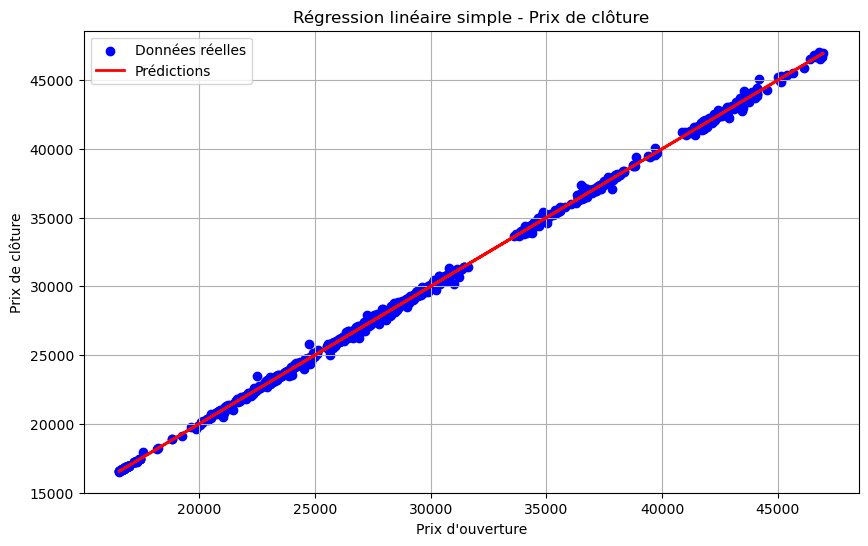

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Charger les données (remplacez par vos données réelles)
df = pd.read_csv("BTCUSDT_hourly_2023.csv")

# Supposons que le prix d'ouverture (open) prédit le prix de clôture (close)
X = df[['open']]  # Variable indépendante
y = df['close']   # Variable dépendante

# Diviser les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modèle de régression linéaire
model = LinearRegression()
model.fit(X_train, y_train)

# Prédictions
y_pred = model.predict(X_test)

# Évaluer le modèle
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE) : {mse}")
print(f"Coefficient of Determination (R²) : {r2}")

# Visualisation des prédictions
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label="Données réelles")
plt.plot(X_test, y_pred, color='red', linewidth=2, label="Prédictions")
plt.title("Régression linéaire simple - Prix de clôture")
plt.xlabel("Prix d'ouverture")
plt.ylabel("Prix de clôture")
plt.legend()
plt.grid()
plt.show()


In [2]:
# Sélectionner plusieurs variables indépendantes
X = df[['open', 'high', 'low', 'volume']]  # Variables indépendantes
y = df['close']                            # Variable dépendante

# Diviser les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modèle de régression linéaire multiple
model = LinearRegression()
model.fit(X_train, y_train)

# Prédictions
y_pred = model.predict(X_test)

# Évaluer le modèle
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE) : {mse}")
print(f"Coefficient of Determination (R²) : {r2}")

# Comparer les prédictions et les données réelles
results = pd.DataFrame({
    "Prix réel": y_test,
    "Prix prédit": y_pred
}).reset_index(drop=True)

print(results.head())


Mean Squared Error (MSE) : 3608.792513470064
Coefficient of Determination (R²) : 0.999913010339714
   Prix réel   Prix prédit
0   37030.87  36980.700401
1   24456.81  24495.079496
2   22713.76  22692.920479
3   26914.50  26913.857852
4   41862.91  41848.061050


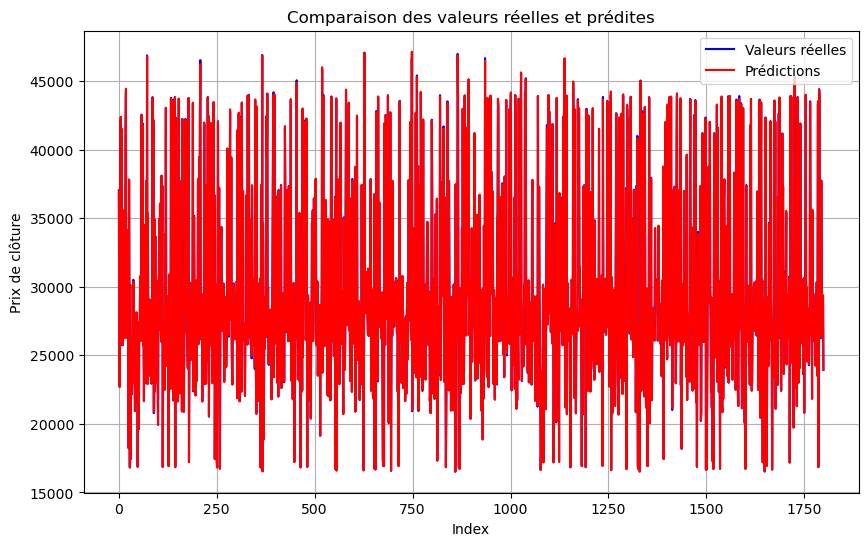

In [3]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label="Valeurs réelles", color='blue')
plt.plot(y_pred, label="Prédictions", color='red')
plt.title("Comparaison des valeurs réelles et prédites")
plt.xlabel("Index")
plt.ylabel("Prix de clôture")
plt.legend()
plt.grid()
plt.show()


/tmp/ipykernel_9509/2011028261.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['predicted_close'] = y_pred


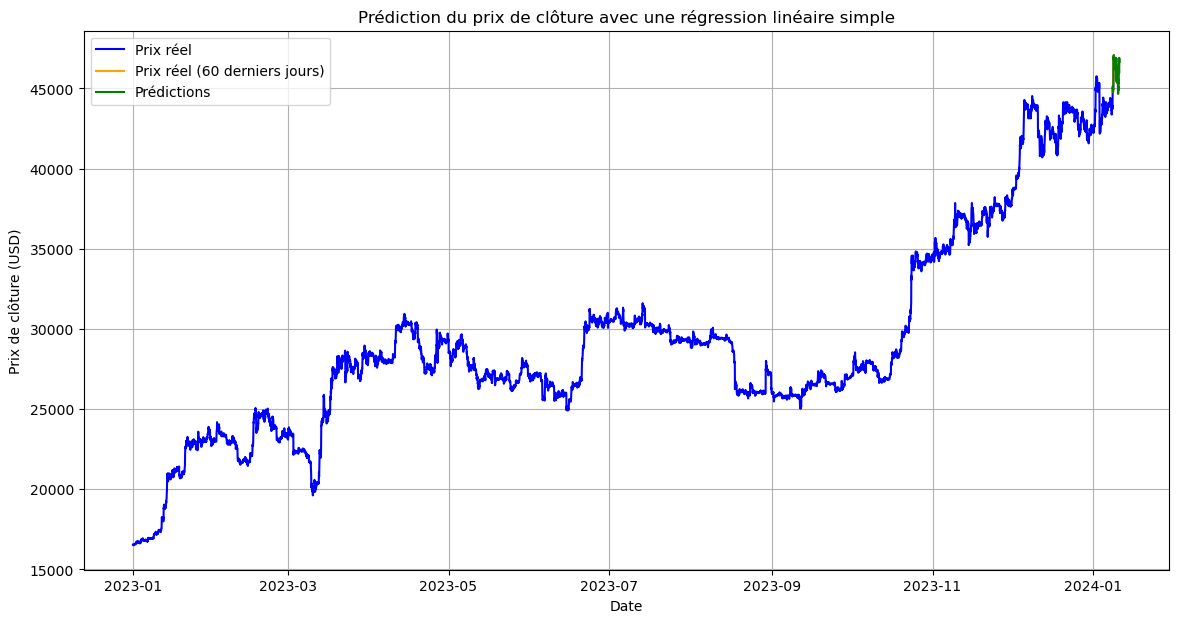

In [4]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Charger les données (remplacez par vos données réelles)
df = pd.read_csv("BTCUSDT_hourly_2023.csv")

# Convertir la colonne 'timestamp' en datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

# Créer le régresseur : prix de clôture décalé d'une période
df['prev_close'] = df['close'].shift(1)

# Supprimer les valeurs nulles (causées par le décalage)
df.dropna(inplace=True)

# Diviser les données en train/test
# On garde les 60 derniers jours comme données de test
train_data = df.iloc[:-60]
test_data = df.iloc[-60:]

# Variables d'entraînement
X_train = train_data[['prev_close']]
y_train = train_data['close']

# Variables de test
X_test = test_data[['prev_close']]
y_test = test_data['close']

# Entraîner le modèle
model = LinearRegression()
model.fit(X_train, y_train)

# Faire des prédictions
y_pred = model.predict(X_test)

# Ajouter les prédictions dans le DataFrame pour le graphique
test_data['predicted_close'] = y_pred

# Graphique des résultats
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['close'], label='Prix réel', color='blue')
plt.plot(test_data.index, test_data['close'], label='Prix réel (60 derniers jours)', color='orange')
plt.plot(test_data.index, test_data['predicted_close'], label='Prédictions', color='green')
plt.title("Prédiction du prix de clôture avec une régression linéaire simple")
plt.xlabel("Date")
plt.ylabel("Prix de clôture (USD)")
plt.legend()
plt.grid()
plt.show()


/tmp/ipykernel_9509/693499806.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['predicted_close'] = y_pred


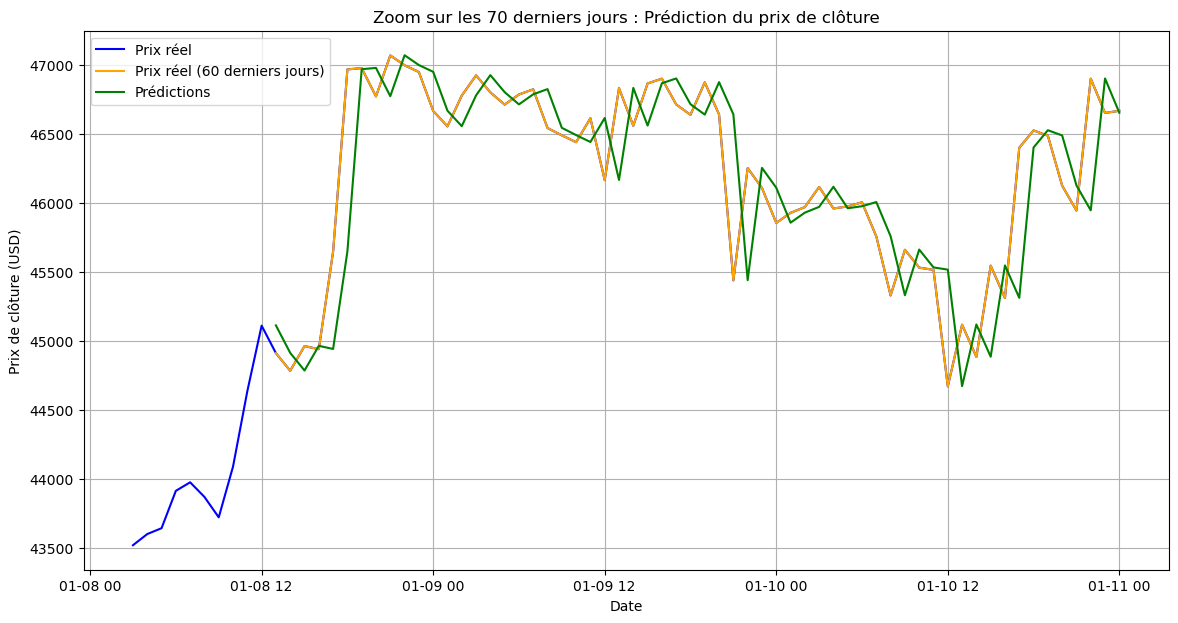

In [5]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Charger les données (remplacez par vos données réelles)
df = pd.read_csv("BTCUSDT_hourly_2023.csv")

# Convertir la colonne 'timestamp' en datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

# Créer le régresseur : prix de clôture décalé d'une période
df['prev_close'] = df['close'].shift(1)

# Supprimer les valeurs nulles (causées par le décalage)
df.dropna(inplace=True)

# Diviser les données en train/test
# On garde les 60 derniers jours comme données de test
train_data = df.iloc[:-60]
test_data = df.iloc[-60:]

# Variables d'entraînement
X_train = train_data[['prev_close']]
y_train = train_data['close']

# Variables de test
X_test = test_data[['prev_close']]
y_test = test_data['close']

# Entraîner le modèle
model = LinearRegression()
model.fit(X_train, y_train)

# Faire des prédictions
y_pred = model.predict(X_test)

# Ajouter les prédictions dans le DataFrame pour le graphique
test_data['predicted_close'] = y_pred

# Filtrer les 70 derniers jours pour le zoom
zoom_data = df.iloc[-70:]
zoom_test_data = test_data.iloc[-60:]  # Les prédictions restent sur 60 jours

# Graphique zoomé sur les 70 derniers jours
plt.figure(figsize=(14, 7))
plt.plot(zoom_data.index, zoom_data['close'], label='Prix réel', color='blue')
plt.plot(zoom_test_data.index, zoom_test_data['close'], label='Prix réel (60 derniers jours)', color='orange')
plt.plot(zoom_test_data.index, zoom_test_data['predicted_close'], label='Prédictions', color='green')
plt.title("Zoom sur les 70 derniers jours : Prédiction du prix de clôture")
plt.xlabel("Date")
plt.ylabel("Prix de clôture (USD)")
plt.legend()
plt.grid()
plt.show()


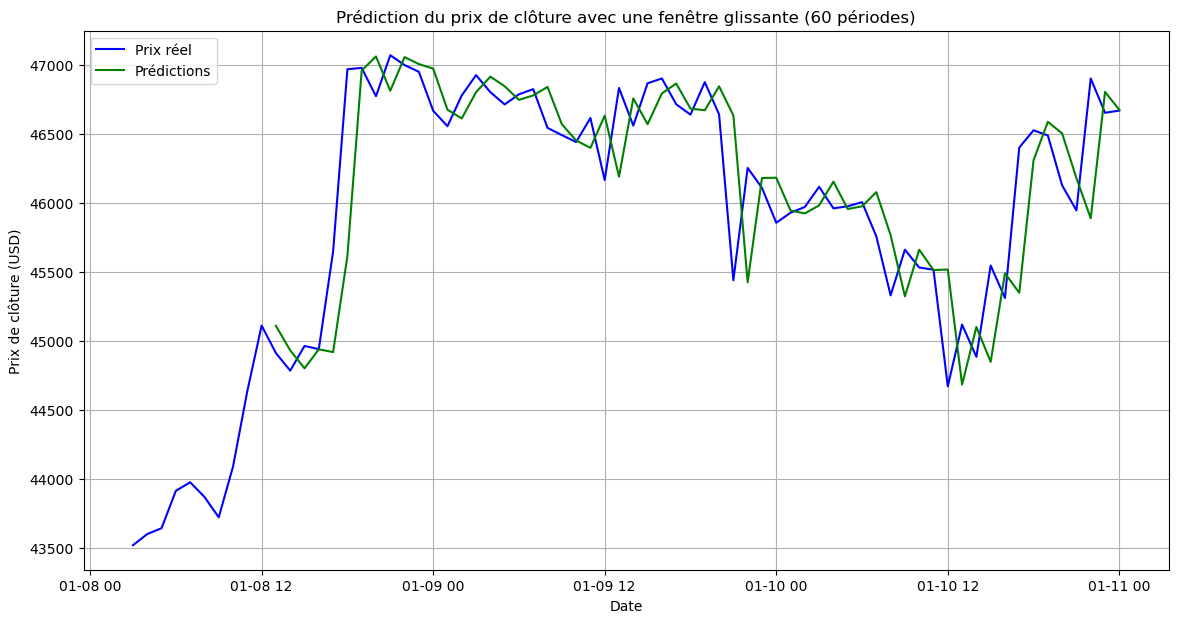

In [6]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Charger les données (remplacez par vos données réelles)
df = pd.read_csv("BTCUSDT_hourly_2023.csv")

# Convertir la colonne 'timestamp' en datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

# Créer les caractéristiques : Fenêtre glissante des 60 dernières périodes
window_size = 60
features = []
targets = []

for i in range(window_size, len(df)):
    features.append(df['close'].iloc[i-window_size:i].values)  # Les 60 derniers prix
    targets.append(df['close'].iloc[i])  # Le prix actuel

# Transformer en matrices numpy
X = np.array(features)
y = np.array(targets)

# Diviser les données en train/test
# On garde les 60 derniers jours pour le test
train_size = len(df) - 60
X_train, X_test = X[:train_size - window_size], X[train_size - window_size:]
y_train, y_test = y[:train_size - window_size], y[train_size - window_size:]

# Entraîner le modèle
model = LinearRegression()
model.fit(X_train, y_train)

# Faire des prédictions pour les 60 derniers jours
y_pred = model.predict(X_test)

# Ajouter les prédictions dans le DataFrame pour les 60 derniers jours
df['predicted_close'] = np.nan
df.iloc[-60:, df.columns.get_loc('predicted_close')] = y_pred

# Graphique zoomé sur les 70 derniers jours
plt.figure(figsize=(14, 7))
plt.plot(df.index[-70:], df['close'][-70:], label='Prix réel', color='blue')
plt.plot(df.index[-60:], df['predicted_close'][-60:], label='Prédictions', color='green')
plt.title("Prédiction du prix de clôture avec une fenêtre glissante (60 périodes)")
plt.xlabel("Date")
plt.ylabel("Prix de clôture (USD)")
plt.legend()
plt.grid()
plt.show()


In [7]:
import pandas as pd
import numpy as np

def data_preprocess(data, regressor, prediction_time):
    """
    Shift the data to perform time series regression.
    
    Inputs:
    - data: DataFrame containing the data.
    - regressor: list of strings, names of the regressors.
    - prediction_time: int, number of periods ahead to predict.
    
    Outputs:
    - price: Numpy array of features.
    - target: Numpy array of targets.
    """
    # Shift the 'close' column upwards by prediction_time periods to create the target
    target = data['close'].shift(-prediction_time).dropna()
    target = np.array(target).reshape(-1, 1)

    # Prepare the features (regressors), exclude the last prediction_time rows
    price = np.array(data[regressor])[:-prediction_time]
    
    return price, target


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

def apply_linear_regression(data, prediction_time, price, target, regressor):
    """
    Apply linear regression to predict future prices.
    
    Inputs:
    - data: DataFrame containing the data.
    - prediction_time: int, number of periods ahead to predict.
    - price: Numpy array of features.
    - target: Numpy array of targets.
    - regressor: list of strings, names of the regressors.
    
    Outputs:
    - prediction_matrix: DataFrame containing actual and predicted prices.
    - future: Numpy array of future predictions from the last date in the dataset.
    - r2: float, R-squared value of the model.
    """
    # Split the data into training and testing sets
    price_train, price_test, target_train, target_test = train_test_split(
        price, target, test_size=0.3, random_state=42)
    
    # Train the linear regression model
    lr = LinearRegression()
    lr.fit(price_train, target_train)
    
    # Predict on the test set
    target_pred = lr.predict(price_test)
    
    # Calculate R-squared
    r2 = r2_score(target_test, target_pred)
    
    # Prepare the prediction matrix for comparison
    prediction_matrix = pd.DataFrame({
        'Actual_Price': target_test.flatten(),
        'Predicted_Price': target_pred.flatten()
    })
    
    # Predict future prices from the last available data
    price_to_future = price[-prediction_time:]
    future = lr.predict(price_to_future)
    
    return prediction_matrix, future, r2


Coefficient de détermination (R²) : 0.9726


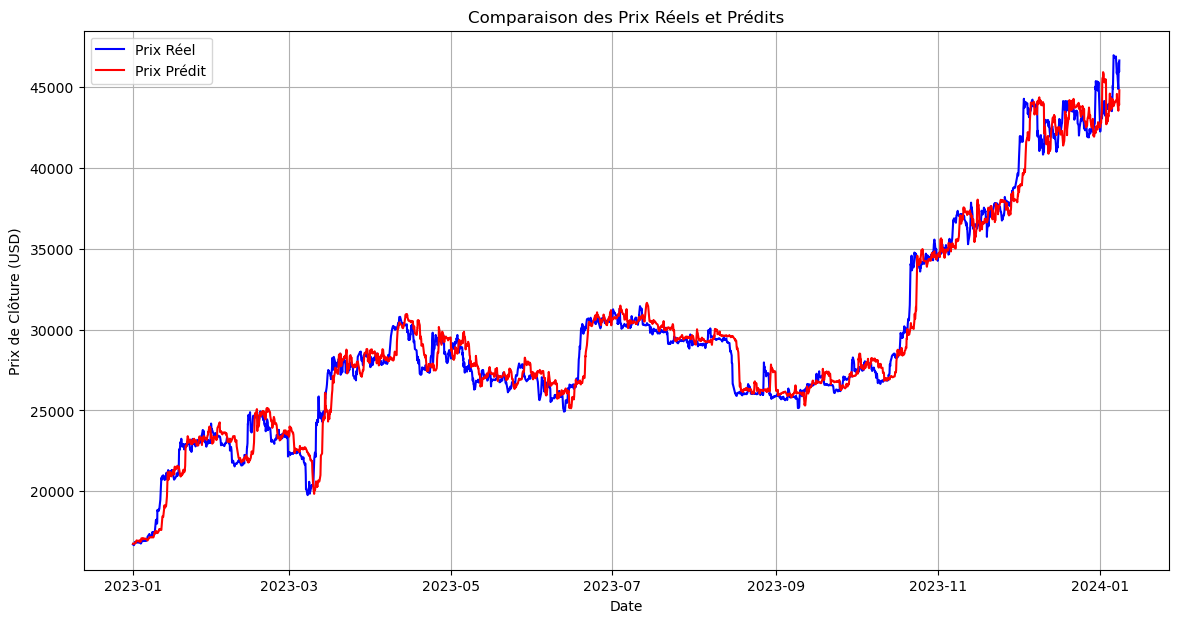

/tmp/ipykernel_9509/2633711433.py:52: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  future_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(hours=1), periods=prediction_time, freq='H')


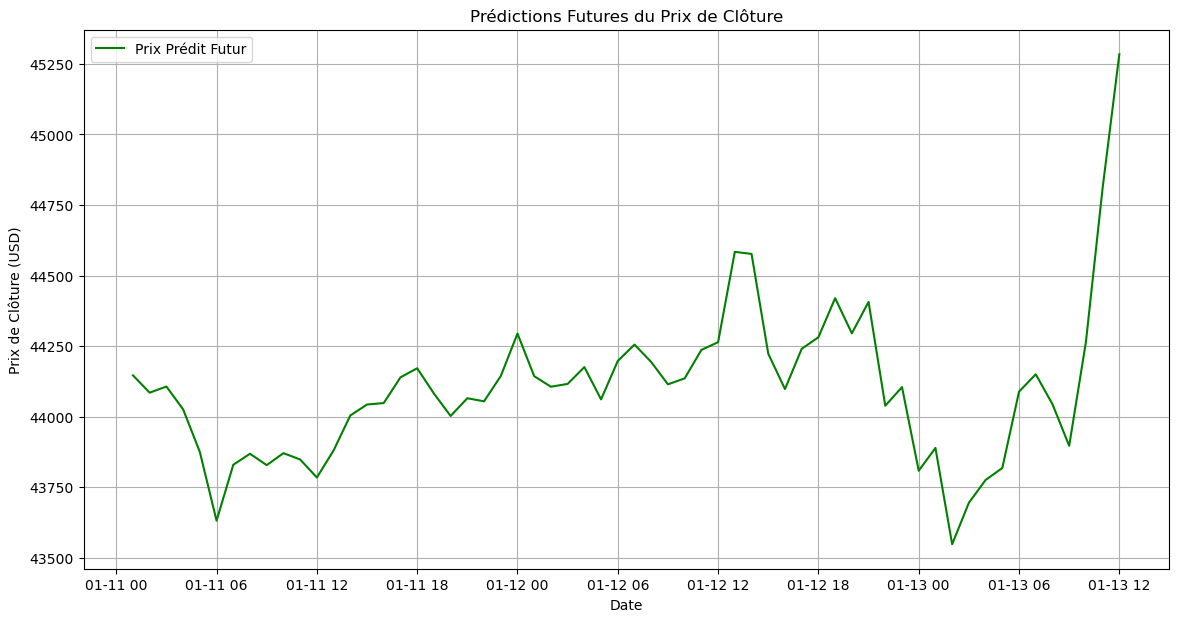

In [9]:
import matplotlib.pyplot as plt

# Charger les données
df = pd.read_csv("BTCUSDT_hourly_2023.csv")

# Convertir 'timestamp' en datetime et définir comme index
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

# Définir les régresseurs (ici, nous utilisons uniquement le prix de clôture)
regressor = ['close']

# Définir le temps de prédiction (par exemple, prédire 60 périodes à l'avance)
prediction_time = 60  # Vous pouvez ajuster ce nombre selon vos besoins

# Préparer les données
price, target = data_preprocess(df, regressor, prediction_time)

# Appliquer la régression linéaire
prediction_matrix, future, r2 = apply_linear_regression(df, prediction_time, price, target, regressor)

# Afficher le R²
print(f"Coefficient de détermination (R²) : {r2:.4f}")

# Visualiser les résultats
# Note : Les index de prediction_matrix ne correspondent pas aux dates, nous allons les ajuster

# Obtenir les indices des données de test
_, price_test_indices = train_test_split(
    np.arange(len(price)), test_size=0.3, random_state=42)

# Obtenir les dates correspondantes
test_dates = df.index[:-prediction_time][price_test_indices]

# Ajouter les dates dans prediction_matrix
prediction_matrix['Date'] = test_dates
prediction_matrix.set_index('Date', inplace=True)
prediction_matrix.sort_index(inplace=True)

# Tracer les prix réels vs prédits
plt.figure(figsize=(14, 7))
plt.plot(prediction_matrix.index, prediction_matrix['Actual_Price'], label='Prix Réel', color='blue')
plt.plot(prediction_matrix.index, prediction_matrix['Predicted_Price'], label='Prix Prédit', color='red')
plt.title("Comparaison des Prix Réels et Prédits")
plt.xlabel("Date")
plt.ylabel("Prix de Clôture (USD)")
plt.legend()
plt.grid()
plt.show()

# Prédictions futures
future_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(hours=1), periods=prediction_time, freq='H')
future_df = pd.DataFrame({
    'Predicted_Price': future.flatten()
}, index=future_dates)

# Tracer les prédictions futures
plt.figure(figsize=(14, 7))
plt.plot(future_df.index, future_df['Predicted_Price'], label='Prix Prédit Futur', color='green')
plt.title("Prédictions Futures du Prix de Clôture")
plt.xlabel("Date")
plt.ylabel("Prix de Clôture (USD)")
plt.legend()
plt.grid()
plt.show()


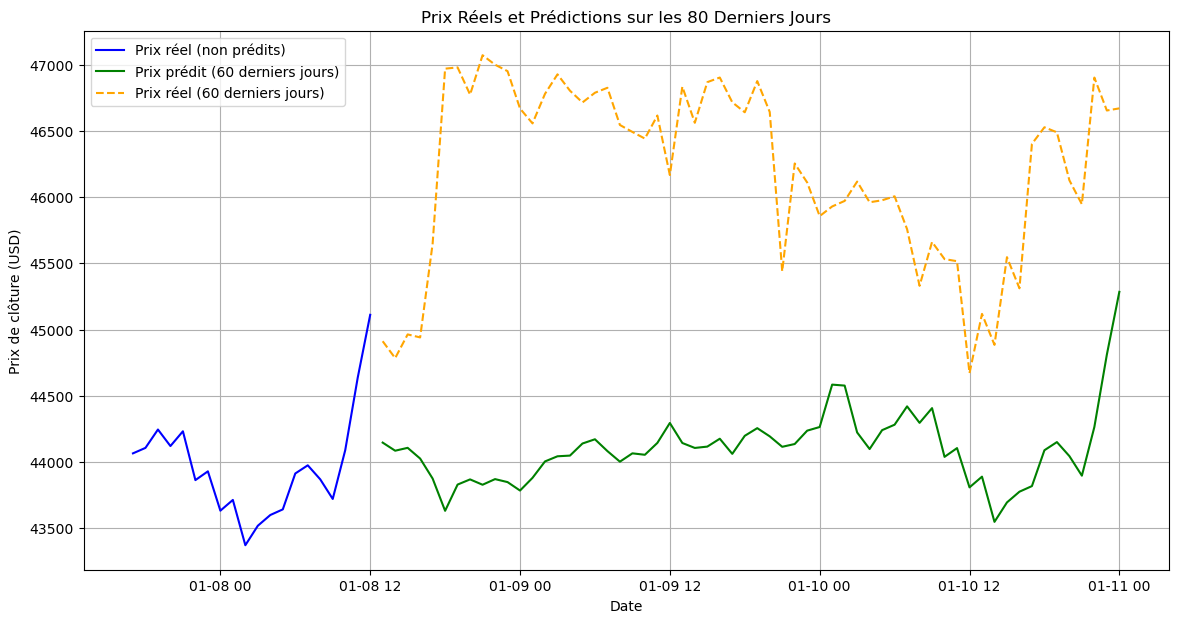

In [10]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Charger les données (remplacez par vos données réelles)
df = pd.read_csv("BTCUSDT_hourly_2023.csv")

# Convertir 'timestamp' en datetime et définir comme index
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

# Définir les régresseurs (ici, nous utilisons uniquement le prix de clôture)
regressor = ['close']

# Définir le temps de prédiction (par exemple, prédire 60 périodes à l'avance)
prediction_time = 60

# Préparer les données avec la fonction data_preprocess
def data_preprocess(data, regressor, prediction_time):
    target = data['close'].shift(-prediction_time).dropna()
    target = np.array(target).reshape(-1, 1)
    price = np.array(data[regressor])[:-prediction_time]
    return price, target

# Appliquer la régression avec apply_linear_regression
def apply_linear_regression(data, prediction_time, price, target, regressor):
    # Split the data
    price_train, price_test, target_train, target_test = train_test_split(
        price, target, test_size=0.3, random_state=42)

    # Train the model
    lr = LinearRegression()
    lr.fit(price_train, target_train)

    # Predict on the test set
    target_pred = lr.predict(price_test)

    # Calculate R-squared
    r2 = r2_score(target_test, target_pred)

    # Predict future prices from the last available data
    price_to_future = price[-prediction_time:]
    future = lr.predict(price_to_future)

    return future, r2

# Préparer les données
price, target = data_preprocess(df, regressor, prediction_time)

# Appliquer la régression linéaire
future, r2 = apply_linear_regression(df, prediction_time, price, target, regressor)

# Ajouter les prédictions dans le DataFrame
df['predicted_close'] = np.nan
df.iloc[-prediction_time:, df.columns.get_loc('predicted_close')] = future.flatten()

# Graphique pour les 80 derniers jours (20 jours non prédits + 60 jours prédits)
plt.figure(figsize=(14, 7))

# Afficher les 20 derniers jours de valeurs non prédits
plt.plot(df.index[-80:-60], df['close'][-80:-60], label="Prix réel (non prédits)", color='blue')

# Afficher les 60 derniers jours de prédictions
plt.plot(df.index[-60:], df['predicted_close'][-60:], label="Prix prédit (60 derniers jours)", color='green')

# Afficher les valeurs réelles des 60 derniers jours
plt.plot(df.index[-60:], df['close'][-60:], label="Prix réel (60 derniers jours)", color='orange', linestyle='--')

# Configuration du graphique
plt.title("Prix Réels et Prédictions sur les 80 Derniers Jours")
plt.xlabel("Date")
plt.ylabel("Prix de clôture (USD)")
plt.legend()
plt.grid()
plt.show()


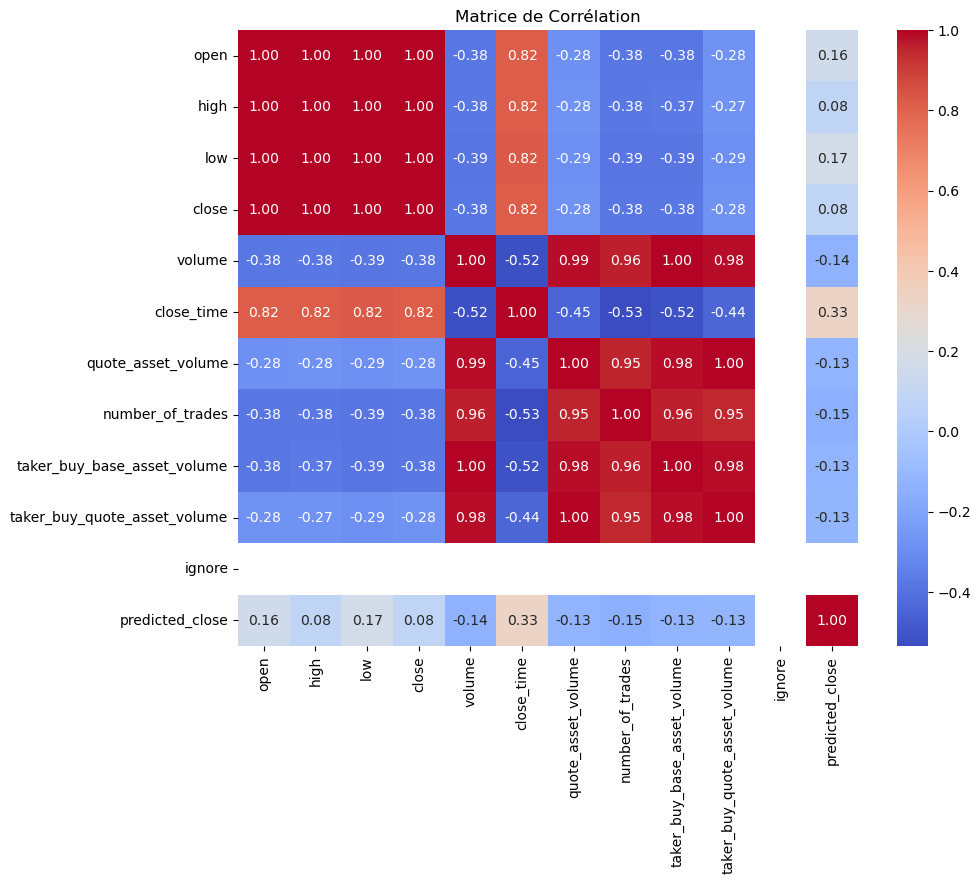

Matrice de Covariance :
                                       open          high           low  \
open                          4.008695e+07  4.023433e+07  3.991298e+07   
high                          4.023433e+07  4.039625e+07  4.006115e+07   
low                           3.991298e+07  4.006115e+07  3.975604e+07   
close                         4.008534e+07  4.024368e+07  3.992295e+07   
volume                       -1.566998e+07 -1.544572e+07 -1.588079e+07   
close_time                    4.852265e+13  4.864373e+13  4.839800e+13   
quote_asset_volume           -2.703210e+11 -2.638706e+11 -2.766182e+11   
number_of_trades             -3.547420e+08 -3.503268e+08 -3.591207e+08   
taker_buy_base_asset_volume  -7.818310e+06 -7.697012e+06 -7.915571e+06   
taker_buy_quote_asset_volume -1.351186e+11 -1.316217e+11 -1.380258e+11   
ignore                        0.000000e+00  0.000000e+00  0.000000e+00   
predicted_close               3.030152e+04  1.435236e+04  3.367742e+04   

            

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Matrice de corrélation
corr_matrix = df.corr()

# Afficher la matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de Corrélation")
plt.show()

# Matrice de covariance
cov_matrix = df.cov()
print("Matrice de Covariance :\n", cov_matrix)


In [13]:
pip install ta 

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=6572cfe60f0a611bc33bb65cc1e231d630c6c539454499ceb90300f342dd066b
  Stored in directory: /home/onyxia/.cache/pip/wheels/5c/a1/5f/c6b85a7d9452057be4ce68a8e45d77ba34234a6d46581777c6
Successfully built ta
Note: you may need to restart the kernel to use updated packages.


In [14]:
from ta.momentum import RSIIndicator
from ta.trend import EMAIndicator, MACD
from ta.volatility import AverageTrueRange

# Ajouter EMA (Exponential Moving Average)
df['EMA_14'] = EMAIndicator(close=df['close'], window=14).ema_indicator()

# Ajouter RSI (Relative Strength Index)
df['RSI_14'] = RSIIndicator(close=df['close'], window=14).rsi()

# Ajouter ATR (Average True Range)
df['ATR_14'] = AverageTrueRange(high=df['high'], low=df['low'], close=df['close'], window=14).average_true_range()

# Ajouter MACD (Moving Average Convergence Divergence)
macd = MACD(close=df['close'], window_slow=26, window_fast=12, window_sign=9)
df['MACD'] = macd.macd()
df['MACD_Signal'] = macd.macd_signal()

# Supprimer les valeurs nulles causées par les calculs d'indicateurs
df.dropna(inplace=True)


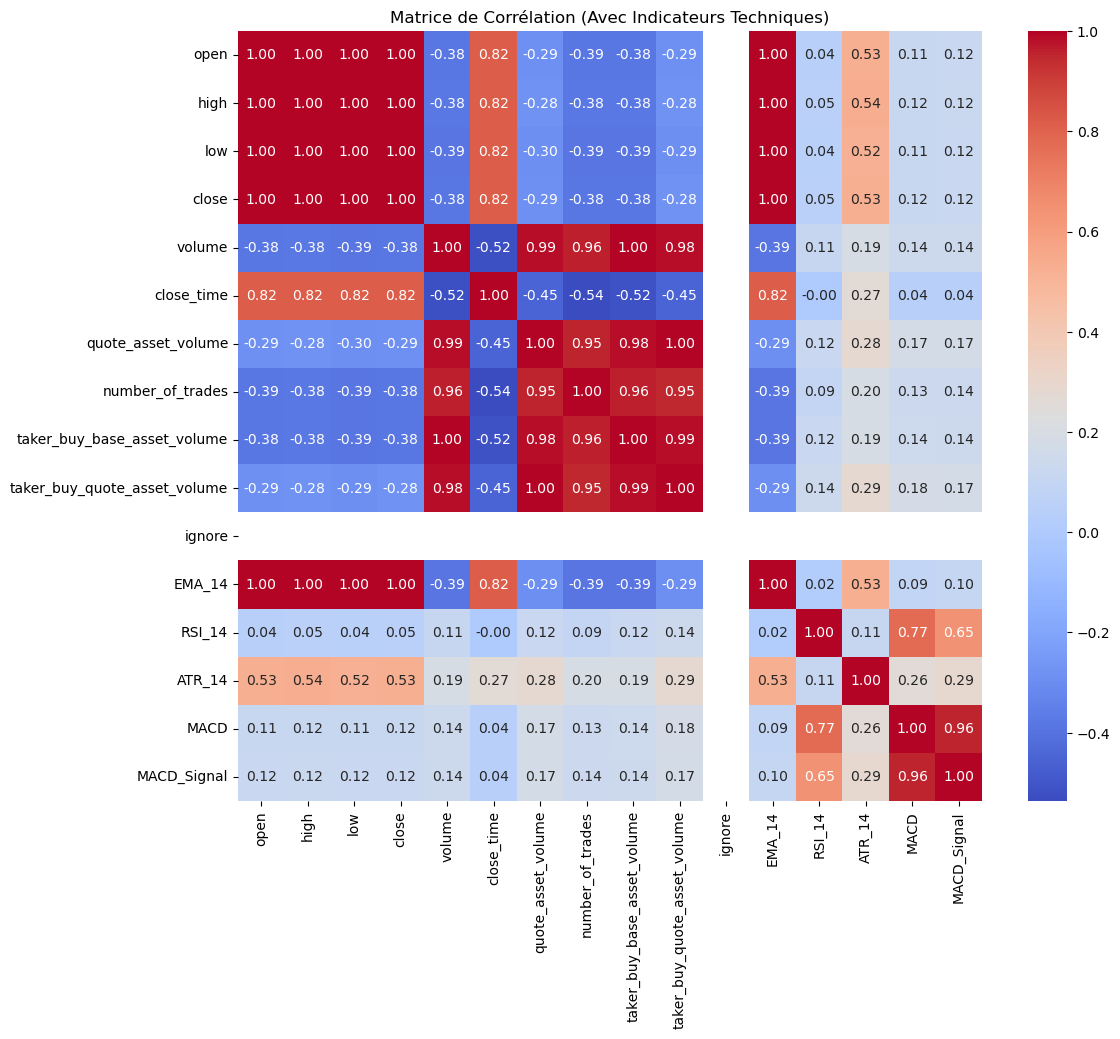

Liste des régresseurs utilisés : ['open', 'high', 'low', 'volume', 'close_time', 'quote_asset_volume', 'number_of_trades', 'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume', 'ignore', 'EMA_14', 'RSI_14', 'ATR_14', 'MACD', 'MACD_Signal']
Mean Squared Error (MSE) : 3013.4361
Coefficient of Determination (R²) : 0.9999
   Prix Réel   Prix Prédit
0   30404.31  30421.521269
1   31630.00  31534.940986
2   28017.22  28003.256673
3   30160.71  30115.105518
4   22916.45  22930.908780


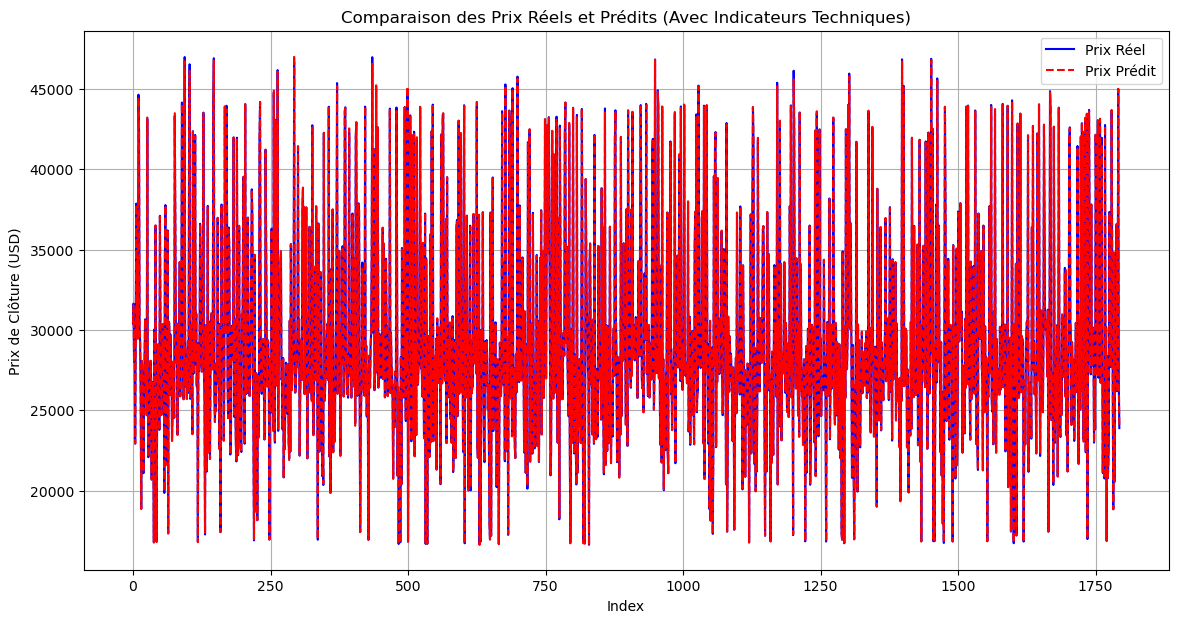

In [15]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
from ta.momentum import RSIIndicator
from ta.trend import EMAIndicator, MACD
from ta.volatility import AverageTrueRange

# Charger les données (remplacez par vos données réelles)
df = pd.read_csv("BTCUSDT_hourly_2023.csv")

# Convertir 'timestamp' en datetime et définir comme index
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

# Ajouter EMA, RSI, ATR, MACD
df['EMA_14'] = EMAIndicator(close=df['close'], window=14).ema_indicator()
df['RSI_14'] = RSIIndicator(close=df['close'], window=14).rsi()
df['ATR_14'] = AverageTrueRange(high=df['high'], low=df['low'], close=df['close'], window=14).average_true_range()
macd = MACD(close=df['close'], window_slow=26, window_fast=12, window_sign=9)
df['MACD'] = macd.macd()
df['MACD_Signal'] = macd.macd_signal()

# Supprimer les valeurs nulles causées par les calculs d'indicateurs
df.dropna(inplace=True)

# Étudier les corrélations
corr_matrix = df.corr()

# Afficher la matrice de corrélation
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de Corrélation (Avec Indicateurs Techniques)")
plt.show()

# Identifier les régresseurs (toutes les colonnes sauf 'close')
regressors = [col for col in df.columns if col != 'close']
print("Liste des régresseurs utilisés :", regressors)

# Diviser les données en train/test
X = df[regressors]
y = df['close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraîner le modèle de régression linéaire multiple
model = LinearRegression()
model.fit(X_train, y_train)

# Faire des prédictions
y_pred = model.predict(X_test)

# Évaluer le modèle
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE) : {mse:.4f}")
print(f"Coefficient of Determination (R²) : {r2:.4f}")

# Comparer les prédictions et les valeurs réelles
results = pd.DataFrame({
    "Prix Réel": y_test,
    "Prix Prédit": y_pred
}).reset_index(drop=True)

print(results.head())

# Graphique des prédictions vs valeurs réelles
plt.figure(figsize=(14, 7))
plt.plot(results["Prix Réel"], label="Prix Réel", color='blue')
plt.plot(results["Prix Prédit"], label="Prix Prédit", color='red', linestyle='--')
plt.title("Comparaison des Prix Réels et Prédits (Avec Indicateurs Techniques)")
plt.xlabel("Index")
plt.ylabel("Prix de Clôture (USD)")
plt.legend()
plt.grid()
plt.show()


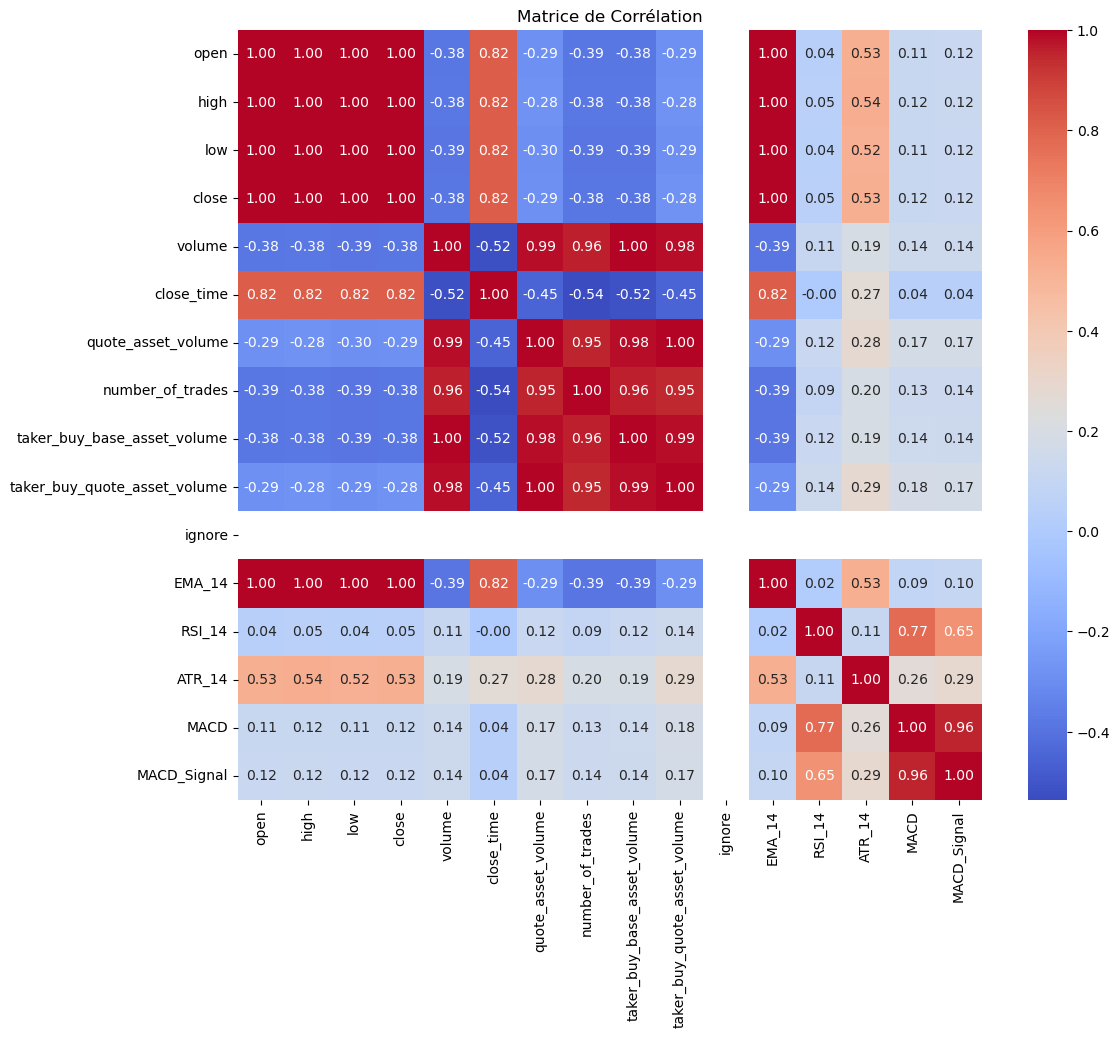

Corrélations avec 'close' :
 close                           1.000000
high                            0.999858
low                             0.999844
open                            0.999758
EMA_14                          0.999280
close_time                      0.817020
ATR_14                          0.531150
MACD_Signal                     0.122047
MACD                            0.115011
RSI_14                          0.047328
taker_buy_quote_asset_volume   -0.284065
quote_asset_volume             -0.286570
taker_buy_base_asset_volume    -0.381299
volume                         -0.384050
number_of_trades               -0.384912
ignore                               NaN
Name: close, dtype: float64


In [17]:
# Calculer la matrice de corrélation
corr_matrix = df.corr()

# Afficher la matrice de corrélation
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de Corrélation")
plt.show()

# Afficher les corrélations avec la variable cible 'close'
corr_target = corr_matrix['close'].sort_values(ascending=False)
print("Corrélations avec 'close' :\n", corr_target)


In [18]:
# Seuil pour inclure les variables fortement corrélées avec 'close'
threshold = 0.3
selected_features = corr_target[abs(corr_target) > threshold].index.drop('close')
print("Variables sélectionnées :", list(selected_features))


Variables sélectionnées : ['high', 'low', 'open', 'EMA_14', 'close_time', 'ATR_14', 'taker_buy_base_asset_volume', 'volume', 'number_of_trades']


In [19]:
# Sélectionner les colonnes pertinentes
regressors = list(selected_features)

# Diviser les données en train/test
X = df[regressors]
y = df['close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraîner le modèle
model = LinearRegression()
model.fit(X_train, y_train)

# Faire des prédictions
y_pred = model.predict(X_test)

# Évaluer le modèle
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE) : {mse:.4f}")
print(f"Coefficient of Determination (R²) : {r2:.4f}")


Mean Squared Error (MSE) : 3888.2895
Coefficient of Determination (R²) : 0.9999


In [20]:
from sklearn.feature_selection import SelectKBest, f_regression

# Appliquer SelectKBest pour sélectionner les k meilleures variables
k = 5  # Nombre de variables à sélectionner
selector = SelectKBest(score_func=f_regression, k=k)
X_new = selector.fit_transform(df[regressors], y)

# Obtenir les variables sélectionnées
selected_columns = np.array(regressors)[selector.get_support()]
print("Variables sélectionnées par SelectKBest :", selected_columns)


Variables sélectionnées par SelectKBest : ['high' 'low' 'open' 'EMA_14' 'close_time']


Variables sélectionnées (3 meilleures) : ['high' 'low' 'open']
Mean Squared Error (MSE) : 4225.1874
Coefficient of Determination (R²) : 0.9999
   Prix Réel   Prix Prédit
0   30404.31  30426.911005
1   31630.00  31553.343243
2   28017.22  27981.583166
3   30160.71  30152.330545
4   22916.45  22912.194413


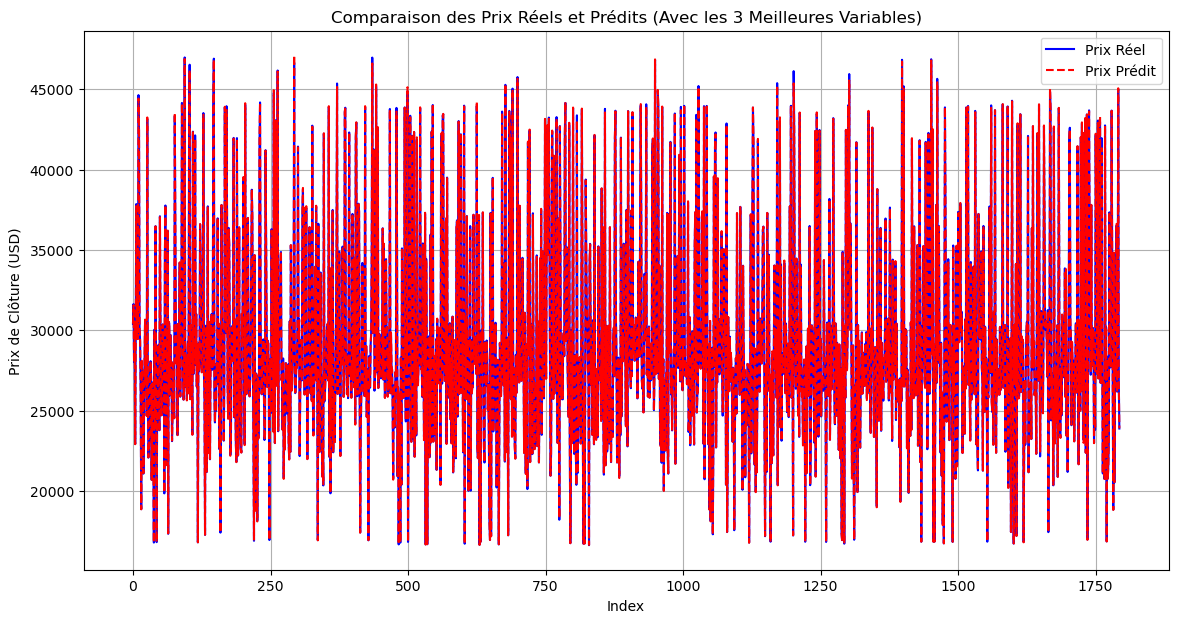

In [24]:
# Données explicatives (features) et cible (target)
X = df[regressors]
y = df['close']

# Sélectionner les k meilleures variables avec SelectKBest
k = 3  # Nombre de variables à sélectionner
selector = SelectKBest(score_func=f_regression, k=k)
X_new = selector.fit_transform(X, y)

# Obtenir les noms des variables sélectionnées
selected_columns = np.array(regressors)[selector.get_support()]
print(f"Variables sélectionnées ({k} meilleures) : {selected_columns}")

# Diviser les données en train/test en utilisant les variables sélectionnées
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Entraîner le modèle de régression linéaire multiple
model = LinearRegression()
model.fit(X_train, y_train)

# Faire des prédictions
y_pred = model.predict(X_test)

# Évaluer le modèle
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE) : {mse:.4f}")
print(f"Coefficient of Determination (R²) : {r2:.4f}")

# Comparer les prédictions et les valeurs réelles
results = pd.DataFrame({
    "Prix Réel": y_test,
    "Prix Prédit": y_pred
}).reset_index(drop=True)

print(results.head())

# Graphique des prédictions vs valeurs réelles
plt.figure(figsize=(14, 7))
plt.plot(results["Prix Réel"], label="Prix Réel", color='blue')
plt.plot(results["Prix Prédit"], label="Prix Prédit", color='red', linestyle='--')
plt.title(f"Comparaison des Prix Réels et Prédits (Avec les {k} Meilleures Variables)")
plt.xlabel("Index")
plt.ylabel("Prix de Clôture (USD)")
plt.legend()
plt.grid()
plt.show()

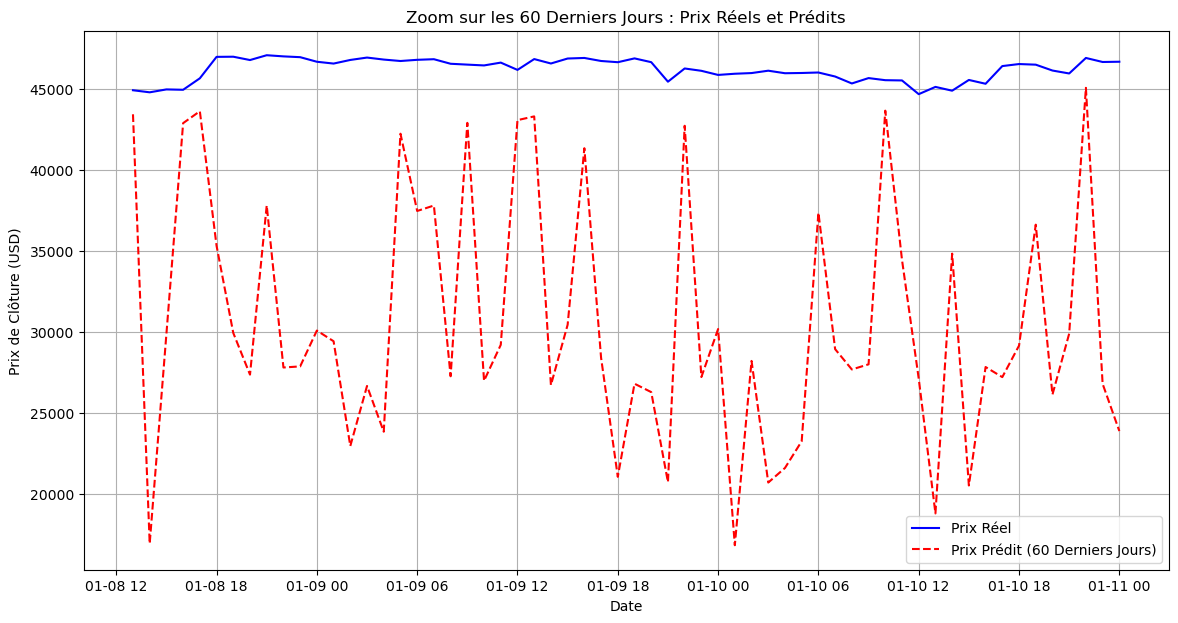

In [25]:
# Ajouter un index temporel pour les 60 derniers jours
subset_df = df.tail(60)

plt.figure(figsize=(14, 7))
plt.plot(subset_df.index, subset_df['close'], label="Prix Réel", color='blue')
plt.plot(subset_df.index, y_pred[-60:], label="Prix Prédit (60 Derniers Jours)", color='red', linestyle='--')
plt.title("Zoom sur les 60 Derniers Jours : Prix Réels et Prédits")
plt.xlabel("Date")
plt.ylabel("Prix de Clôture (USD)")
plt.legend()
plt.grid()
plt.show()


Mean Squared Error (MSE): 0.0000
Coefficient of Determination (R²): 1.0000


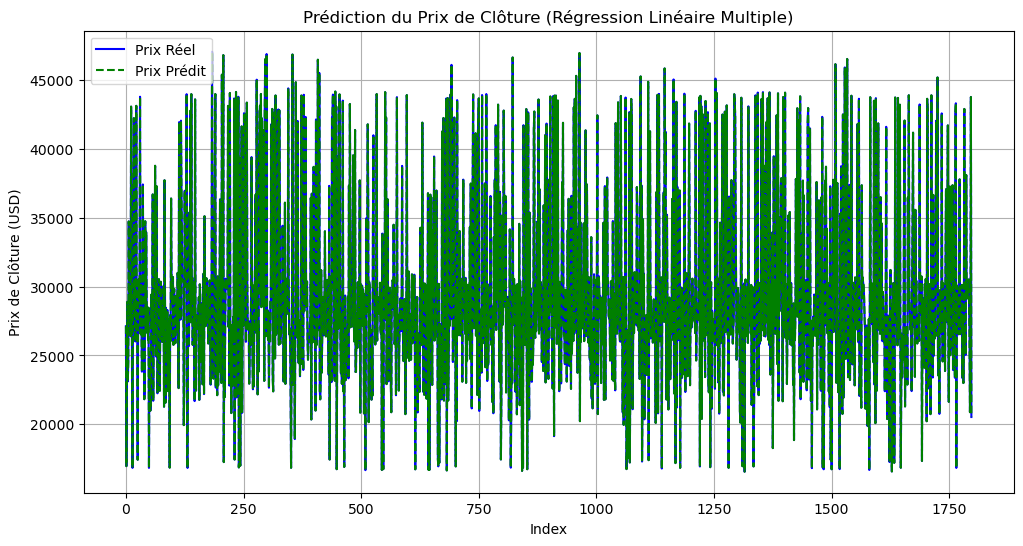

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from ta.trend import EMAIndicator

# Charger les données (remplacez par vos données réelles)
df = pd.read_csv("BTCUSDT_hourly_2023.csv")

# Convertir 'timestamp' en datetime et définir comme index
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

# Ajouter EMA (Exponential Moving Average)
df['EMA_14'] = EMAIndicator(close=df['close'], window=14).ema_indicator()

# Supprimer les valeurs nulles causées par les calculs d'indicateurs
df.dropna(inplace=True)

# Normalisation des variables explicatives ('close', 'close_time', 'EMA_14')
scaler = StandardScaler()
variables = ['close', 'close_time', 'EMA_14']
X = scaler.fit_transform(df[variables])

# Définir la cible (y = prix de clôture)
y = df['close']

# Diviser les données en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraîner le modèle de régression linéaire multiple
model = LinearRegression()
model.fit(X_train, y_train)

# Faire des prédictions
y_pred = model.predict(X_test)

# Évaluer les performances
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Coefficient of Determination (R²): {r2:.4f}")

# Comparer les prédictions et les valeurs réelles
results = pd.DataFrame({
    "Prix Réel": y_test,
    "Prix Prédit": y_pred
}).reset_index(drop=True)

# Graphique : Comparaison des prix réels et prédits
plt.figure(figsize=(12, 6))
plt.plot(results["Prix Réel"], label="Prix Réel", color='blue')
plt.plot(results["Prix Prédit"], label="Prix Prédit", color='green', linestyle='--')
plt.title("Prédiction du Prix de Clôture (Régression Linéaire Multiple)")
plt.xlabel("Index")
plt.ylabel("Prix de Clôture (USD)")
plt.legend()
plt.grid()
plt.show()


Mean Squared Error (MSE): 0.0000
Coefficient of Determination (R²): 1.0000


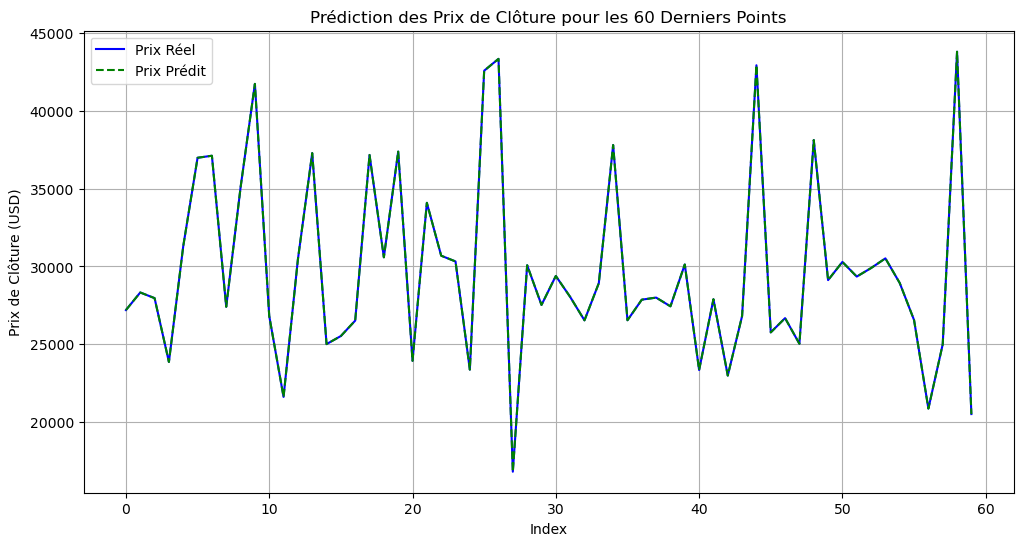

In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from ta.trend import EMAIndicator

# Charger les données (remplacez par vos données réelles)
df = pd.read_csv("BTCUSDT_hourly_2023.csv")

# Convertir 'timestamp' en datetime et définir comme index
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

# Ajouter EMA (Exponential Moving Average)
df['EMA_14'] = EMAIndicator(close=df['close'], window=14).ema_indicator()

# Supprimer les valeurs nulles causées par les calculs d'indicateurs
df.dropna(inplace=True)

# Normalisation des variables explicatives ('close', 'close_time', 'EMA_14')
scaler = StandardScaler()
variables = ['close', 'close_time', 'EMA_14']
X = scaler.fit_transform(df[variables])

# Définir la cible (y = prix de clôture)
y = df['close']

# Diviser les données en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraîner le modèle de régression linéaire multiple
model = LinearRegression()
model.fit(X_train, y_train)

# Faire des prédictions
y_pred = model.predict(X_test)

# Évaluer les performances
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Coefficient of Determination (R²): {r2:.4f}")

# Comparer les prédictions et les valeurs réelles pour une période limitée (par ex., dernier mois)
subset_size = 60  # Par exemple, 60 derniers points
results = pd.DataFrame({
    "Prix Réel": y_test[-subset_size:].values,
    "Prix Prédit": y_pred[-subset_size:]
}).reset_index(drop=True)

# Graphique : Comparaison des prix réels et prédits pour une période limitée
plt.figure(figsize=(12, 6))
plt.plot(results.index, results["Prix Réel"], label="Prix Réel", color='blue')
plt.plot(results.index, results["Prix Prédit"], label="Prix Prédit", color='green', linestyle='--')
plt.title("Prédiction des Prix de Clôture pour les 60 Derniers Points")
plt.xlabel("Index")
plt.ylabel("Prix de Clôture (USD)")
plt.legend()
plt.grid()
plt.show()
